<a href="https://colab.research.google.com/github/naomifridman/Introduction_to_deep_learning/blob/master/lec3_Delta_rule_learning_mlp_backpropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Learning works and Multi Layer Neural Networks
### Delta rule for learning, Gradient Decent and backpropogation

In [4]:
!git clone https://github.com/naomifridman/Introduction_to_deep_learning.git

fatal: destination path 'Introduction_to_deep_learning' already exists and is not an empty directory.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
import Introduction_to_deep_learning.utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline  

Networks without hidden units are very limited in what they can learn to model. What we need is multiple layers of non-linear hidden units. <br>
The challenge is: **how to train such networks ?**<br>
We need a way to update all the weights not just the last layer like in a perceptron. It is a hard problem, and it took the researchers 20 years to find the right method. <br>


![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/training_model.png)
Any hidden unit, can affect many other units, and affect the results, in many ways. So we use a method to combine all those effects, and focus on investigating the effect, the weight have, on the overall error.<br>

The aim of the learning is to minimize the error summed (or mean) over all training cases. <br>
To achieve that,we need a **measure** of that error. For simplicity, we will use the square difference between the target output and the actual output. 

### Loss Function For learning
The squared loss is a popular loss function, also known as L2 loss.The squared loss is the squared distance between the prediction and the true label. <br>
Lets mark:
* $x\, -\, The\, input$
* $\hat{y}\, or \,y'\, - \,The\, true\, labels$<br>
* $y = predictions(x) = f(x)\; Model's\,  predictions$<br>

The squared loss for a single example is: ${(\hat{y} - y)}^2$<br>

 
#### Mean square error (MSE) 
is the average squared loss per example over the whole dataset. 
To calculate MSE, sum up all the squared
losses for individual examples and then divide by the number of examples:
    $$ MSE = \frac{1}{N} \sum_{(x,y)\in D} (\hat{y} - f(x))^2 = \frac{1}{N} \sum_{(x,y)\in D} (\hat{y} - y)^2$$
> MSE is popular in machine learning, mainly from historical reasons, since all the math was initially calculated with MSE. But it is not necessary the best. For different problems, there are other practical loss functions that performs better.

#### The goal of training a model is to find a set of weights that produce a minimal loss, on average, across all examples.


To find the minimum of the loss function, we will use An iterative method. <br>
Iterative methods, are usually less efficient, but much easier to generalize.

## Gradient Decent - Minimize loss function iterativly 
Intuition: Imagine you stand in a canyon, or a bowl, and you want to get to the lowest point. If you walk in small steps towards the steepest part, this will get you to the lowest point, if the canyon (or the bowl) is convex.
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/dune11.jpg)
### Delta rule for learning
This intuition is defined as the delta rule.
$$ \Delta{W} = \alpha*(derivative\, of\, the \,loss\, function)$$

* $\alpha$ - learning rate, is the (small) size of the step.

The weights update will be:
$$ W_{new} = W_{old} - \Delta{W}$$



But how do we implement the delta rule for a multi layer network ?
This implementation is called back-propagation. Back-propagation, is an abbreviation for **"backwards propagation of errors"**, is a mechanism used to update the weights using gradient descent. It calculates the gradient of the error function with respect to the neural networks weights. The calculation proceeds backwards through the network.
![title](gradient_desent.png)

## Back-propagation - Example with simple network
Back propagation,is a method to propagate the error, back to the weights, and update them in away that will minimize the error.<br>
Math is simple algebra, but there are some indexing to follow. The coded is illustrative, specific and not too general. Still you can play with it and test different hyper parameters and data sets.<br>
### Multiple Layer Neural Networks example
To implement full back-propagation example, Lets build a simple neural network, with:
* One hidden layer, with 2 neurons
* Input layer of 2 feature and bias
* Output layer, outputs probability of binary classification (the probability to be 1)

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/mlp1j11.JPG)
#### Activation function
For simplicity, we choose all activation functions to be Sigmoid function.

* $z$ - will be the weighted input sum of the input to the neuron
* $y$ - will be the output of the neuron, which is the Sigmoid(z).
* I - the input to the neuron
* W - the neurons weights (same number as inputs)

### Sigmoid activation function
logistic function, which ranges from 0 to 1
Used as last layer, garanty to output propability<br>
The logistic sigmoid function can cause a neural network to get stuck at the training time.
#### Logistic Sigmoid:  
## $\sigma(x)=\frac{1}{1+e^{-x}}$

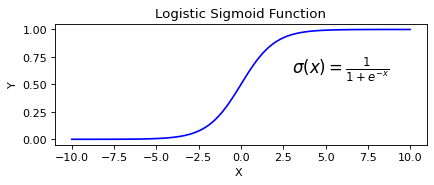

In [7]:
import Introduction_to_deep_learning.utils_plot as uplot
uplot.drow_sigmoid()

##### The Neuron 
All Neurons in our network, calculate weighted sum of the input, and output the results of applying Sigmoid function on the weighted sum.
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/neuron_in_out.JPG)
### Build MLP Step 1. Initialize network with random weights


### Step 2. Forward pass
Given an input, calculate the output. To do that, we calculate all the values in the neurons along the network, until the output.

## Step 3. Back-propagation
To apply the delta rule for learning, we need to define a loss function. Lets use the simple known square error, for **one input sample**:
$$Error = \frac{1}{2}(\hat{y} - y)^2$$
where:
* $\hat{y}$ is the true label, y_train
* $y$ is the prediction calculated by the network

To update weights, according to delta rule, we need to calculate the "influence" of each weight on the target. Mathematically, we need to calculate the partial derivative of the error, with respect to each weight. <br>
Lets mark the weights in our network, and lets mark :
* $o$-output layer, and $h$-hidden layer
* $y_{o}$, and $y_{h}$ are the outputs from output and hidden layers
* $z_{o}$, and $z_{h}$ are the weighted sum of input and neuron weights, of the output and hidden layers.

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/mlp_2hidden_1ou_weightst.jpg)

### Back-propagating error for output layer
Consider $w_1$, We want to know how much a change in $w_1$ affects the total error, aka, $\frac{\partial Error}{\partial w_{1}}$

Using chain rule, we will get:
$$\frac{\partial Error}{\partial w_{1}} = \frac{\partial Error}{\partial y_o} * 
\frac{\partial y_o}{\partial z_{o}} *
\frac{\partial z_{o}}{\partial w_{1}}$$

$$\frac{\partial Error}{\partial y_o} = 2 * \frac{1}{2}(\hat{y} - y_o)^{2 - 1} * -1 =(y_o-\hat{y})$$

We chose Sigmoid activation, which derivative is:
$$\frac{\partial}{\partial x}Sigmoid(x) = Sigmoid(x)(1 - Sigmoid(x))$$


And since:




$$\hat{y} = y_o = \frac{1}{1+e^{-z_{o}}}$$
We get:

$$\frac{\partial y_o}{\partial z_{o}} = y_o*(1-y_o)$$

$$z_{o} = y_{h0}*w_0 + y_{h1}*w_1 = \bar{w_{o}} * \bar{y_h}$$    

$y_{h0}$ ho has no dependence in $w_{1}$, So:
$$\frac{\partial z_{o}}{\partial w_{1}} = y_{h1}$$    


Putting it all together, we get:

$$\frac{\partial Error}{\partial w_{1}} = \frac{\partial Error}{\partial y_o} * 
\frac{\partial y_o}{\partial z_{o}} *
\frac{\partial z_{o}}{\partial w_{1}} =  -(\hat{y}-y_o)*
y_o*(1-y_o)*
y_{h1}
$$

So according to delta rule, to decrease error, we update $w_1$:
$$w_1^{new} = w_1 - \alpha*\frac{\partial Error}{\partial w_{1}} = w_1 + \alpha* (\hat{y}-y_o)*  y_o*(1-y_o)*y_{h1}$$

In the same, we can calculate update for $w_0$:
$$w_0^{new} = w_0 + \alpha* (\hat{y}-y_o)*  y_o*(1-y_o)*y_{ho}$$

Lets mark:
$$ \delta_{i} = y_i*(1-y_i)$$

**We get an update rule for output layer weights:**
### $$w_0^{new} = w_0 + \alpha* \delta_{o}*y_{ho}*(\hat{y}-y_o)$$
### $$w_1^{new} = w_1 + \alpha* \delta_{o}*y_{h1}*(\hat{y}-y_o)$$
**Vector wise:**
### $$\bar{w}^{new} = \bar{w} + \alpha* \delta_{o}*\bar{y}_{h}*(\hat{y}-y_o)$$


### Back-propagating error for hidden layer
Now we need to continue one more layer back,to calculate the update of the weights.<br>

In a similar way, lets calculate: $\frac{\partial Error}{\partial w_{12}}$

$$\frac{\partial Error}{\partial w_{12}} = [\frac{\partial Error}{\partial y_{o}} * 
\frac{\partial y_{o}}{\partial z_{o}}] * 
\frac{\partial z_{o}}{\partial y_{h1}} * 
\frac{\partial y_{h1}}{\partial z_{h1}} *
\frac{\partial z_{h1}}{\partial w_{12}} $$

$$\frac{\partial Error}{\partial w_{12}} = -[\delta_{0}*y_{h1}*(\hat{y}-y_0)]*\frac{\partial z_{o}}{\partial y_{h1}} * 
\frac{\partial y_{h1}}{\partial z_{h1}} *
\frac{\partial z_{h1}}{\partial w_{12}} $$

$$z_{o} = y_{h_0}*w_0 + y_{h_1}*w_1 = \bar{z_h}*\bar{w_o}$$   

$$\frac{\partial z_{o}}{\partial y_{h1}} = w_1$$

$$\frac{\partial y_{h1}}{\partial z_{h1}} = y_{h1}*(1-y_{h1})=\delta_{h1}$$

$$\frac{\partial z_{h1}}{\partial w_{12}} = I_{2}$$

Putting it all together, we get:

$$\frac{\partial Error}{\partial w_{10}} = -(\hat{y}-y_o)*\delta_{o}*y_{h1}*w_1*\delta_{h1}*I_0$$

$$\frac{\partial Error}{\partial w_{11}} = -(\hat{y}-y_o)*\delta_{o}*y_{h1}*w_1*\delta_{h1}*I_1$$

$$\frac{\partial Error}{\partial w_{12}} = -(\hat{y}-y_o)*\delta_{o}*y_{h1}*w_1*\delta_{h1}*I_2$$

We can write, general update rule for hidden layer of our network:

$$\frac{\partial Error}{\partial w_{ij}} = -(\hat{y}-y_o)*\delta_{o}*y_{hi}*w_i*\delta_{hi}*I_j$$

**So, update rule for hidden layer weights, will be:**

### $$w^{new}_{ij} = w_{ij} + \alpha *(\hat{y}-y_o)*\delta_{o}*y_{hi}*w_i*\delta_{hi}*I_j$$

* details https://beckernick.github.io/sigmoid-derivative-neural-network/

## Step 4. Train network
In the train function, in each epoch, we go over all input samples, perform forward pass on each sample, and update weights with back-propagating the error.

## Step 5. Predict with the Trained Network
To predict, with our trained network, all we need to do is to propagate forward the input. The result, is the probability that the class to which the input belong is 1.

### Learn more:
* This part was written as an attempt to understand Hinton's lecture: https://www.coursera.org/learn/neural-networks/lecture/bD3OB/learning-the-weights-of-a-linear-neuron-12-min
* Google machine learning course https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent
* https://en.wikipedia.org/wiki/Backpropagation

### Articles:
* D.E. RummelhartG.E. HintonR.J. Williams. **Learning Internal Representations by Error Propagation** Jan 1986 Nature.